In [10]:
import streamlit as st
import torch
import numpy as np

from generator import Generator
from discriminator import Discriminator
from utils import set_seed
import matplotlib.pyplot as plt
import japanize_matplotlib
import tqdm

In [16]:
G = Generator().eval()
D = Discriminator().eval()
G.load_state_dict(torch.load('ckpt_LSGAN/netG_epoch_541.pth', map_location='cpu'))
D.load_state_dict(torch.load('ckpt_LSGAN/netD_epoch_541.pth', map_location='cpu'))

def generate_image(seed, threshold, max_generate)->list((np.array, float)):
    with torch.no_grad():
        set_seed(seed)
        imgs_preds = []
        for _ in range(max_generate):
            noise = torch.randn(1, 100, 1, 1)
            imtensor = G(noise)
            imarray = imtensor.squeeze(0).detach().numpy().transpose(1, 2, 0)
            pred = D(imtensor).sigmoid().item()
            if pred > threshold:
                imgs_preds.append((imarray, pred))
    return imgs_preds
    


In [17]:
# LSAN
imgs_preds = generate_image(0, 0, 20000)

In [18]:
ls_imgs, ls_preds = [], []
for img_pred in imgs_preds:
    ls_imgs.append(img_pred[0])
    ls_preds.append(img_pred[1])
    

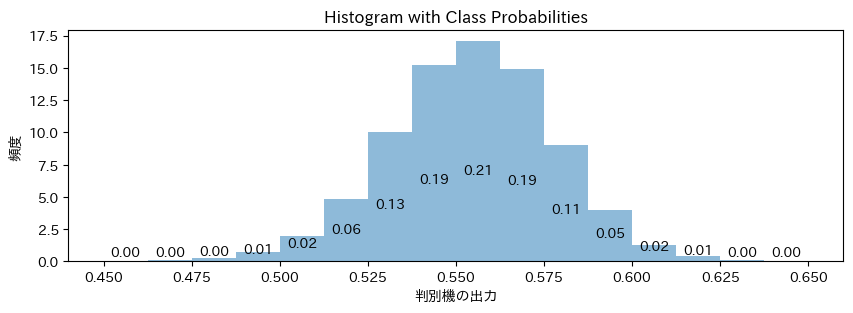

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
start = 0.45
end = 0.65
step = 0.0125
bin_list = [x for x in np.arange(start, end + step, step)]

fig = plt.figure(figsize=(10, 3))
# ヒストグラムを作成
hist, bins, _ = plt.hist(ls_preds, bins=bin_list, density=True, alpha=0.5)  # density=Trueで確率で正規化

# 階級ごとの確率を計算
bin_width = bins[1] - bins[0]
probabilities = hist * bin_width

# 階級ごとの確率を表示するためのテキストを配置
for i in range(len(bins) - 1):
    x = (bins[i] + bins[i + 1]) / 2
    y = 30 *(probabilities[i] + 0.005) # 適宜調整
    plt.text(x, y, f'{probabilities[i]:.2f}', ha='center', va='bottom')

plt.xlabel('判別機の出力')
plt.ylabel('頻度')
plt.title('LSGAN: Histogram with Class Probabilities')
plt.show()

In [31]:
G = Generator().eval()
D = Discriminator().eval()
G.load_state_dict(torch.load('ckpt_DCGAN/netG_epoch_270.pth', map_location='cpu'))
D.load_state_dict(torch.load('ckpt_DCGAN/netD_epoch_270.pth', map_location='cpu'))

def generate_image(seed, threshold, max_generate)->list((np.array, float)):
    with torch.no_grad():
        set_seed(seed)
        imgs_preds = []
        for _ in range(max_generate):
            noise = torch.randn(1, 100, 1, 1)
            imtensor = G(noise)
            imarray = imtensor.squeeze(0).detach().numpy().transpose(1, 2, 0)
            pred = D(imtensor).item()
            if pred > threshold:
                imgs_preds.append((imarray, pred))
    return imgs_preds
    

In [44]:
# DCAN
imgs_preds = generate_image(0, -10, 40000)

In [45]:
dc_imgs, dc_preds = [], []
for img_pred in imgs_preds:
    dc_imgs.append(img_pred[0])
    dc_preds.append(img_pred[1])
    

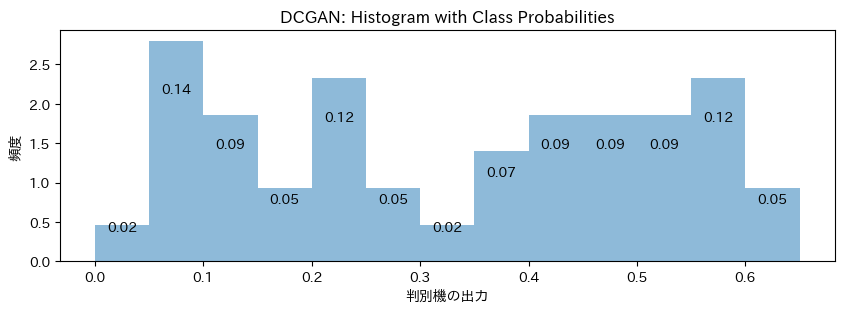

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
start = 0
end = 0.65
step = 0.05
bin_list = [x for x in np.arange(start, end + step, step)]

fig = plt.figure(figsize=(10, 3))
# ヒストグラムを作成
hist, bins, _ = plt.hist(dc_preds, bins=bin_list, density=True, alpha=0.5)  # density=Trueで確率で正規化

# 階級ごとの確率を計算
bin_width = bins[1] - bins[0]
probabilities = hist * bin_width

# 階級ごとの確率を表示するためのテキストを配置
for i in range(len(bins) - 1):
    x = (bins[i] + bins[i + 1]) / 2
    y = 30 *(probabilities[i]/2) # 適宜調整
    plt.text(x, y, f'{probabilities[i]:.2f}', ha='center', va='bottom')

plt.xlabel('判別機の出力')
plt.ylabel('頻度')
plt.title('DCGAN: Histogram with Class Probabilities')
plt.show()

In [20]:
l = len(imgs_preds)
q = l // columns

In [29]:
split_imgs_preds = []
for i in range(q + 1):
    img_pred = imgs_preds[i*columns:(i+1)*columns]
    split_imgs_preds.append(img_pred)

In [33]:
type(split_imgs_preds[-2])

list

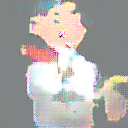

In [37]:
from PIL import Image
img = imgs_preds[0][0]
img = img.squeeze(0).detach().numpy().transpose(1, 2, 0)
img = (img + 1.0) * 127.5
img = np.round(img).astype('uint8')
img.shape
img = Image.fromarray(img)
img

len(imgs_preds)

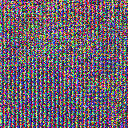

In [32]:
Image.fromarray(img, mode='RGB')

In [52]:
def imarray2pil(imarray):
    imarray = (imarray + 1.0) * 127.5
    imarray = np.round(imarray).astype('uint8')
    img = Image.fromarray(imarray)
    return img

imgs_preds = generate_image(seed=0, threshold=0.5, max_generate=100)
for img_pred in imgs_preds:
        img = img_pred[0]
        pred = img_pred[1]
        img = imarray2pil(img)
        # st.image(img)

2023-08-26 13:22:53.259 
  command:

    streamlit run /Users/hiromimatsumoto/opt/anaconda3/envs/kikagaku/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [46]:
imgs_preds = generate_image(seed=0, threshold=0.5, max_generate=100)
for img_pred in imgs_preds:
    img_pred

In [47]:
img_pred

(tensor([[[[-0.0290, -0.0468, -0.0457,  ..., -0.0413, -0.0564, -0.0486],
           [-0.0526, -0.0574, -0.0590,  ..., -0.0554, -0.0744, -0.0385],
           [-0.0377, -0.0435, -0.0453,  ..., -0.0627, -0.1037, -0.0633],
           ...,
           [-0.0517, -0.0597, -0.0784,  ..., -0.0865, -0.0480, -0.0500],
           [-0.0786, -0.0716, -0.0861,  ..., -0.1142, -0.1676, -0.2106],
           [-0.0942, -0.0374,  0.0161,  ..., -0.0523, -0.0333, -0.1191]],
 
          [[-0.0503, -0.0532, -0.0599,  ..., -0.0410, -0.0898, -0.0670],
           [-0.0412, -0.0785, -0.0408,  ..., -0.0648, -0.0688, -0.0441],
           [-0.0666, -0.0561, -0.0557,  ..., -0.0329, -0.0343, -0.0588],
           ...,
           [ 0.0296, -0.1522,  0.0929,  ..., -0.3148,  0.0293, -0.1061],
           [-0.1277, -0.0227,  0.0666,  ...,  0.0859,  0.2077,  0.1876],
           [-0.0349, -0.1926,  0.0230,  ..., -0.2330, -0.0610, -0.1827]],
 
          [[-0.0520, -0.0457, -0.0666,  ..., -0.0372, -0.0653, -0.0741],
           [-

In [2]:
import numpy as np
np.floor(3.546)

3.0

In [4]:
4 % 3

1

In [5]:
6 // 4

1

In [6]:
6 % 4

2

In [7]:
z = lambda x, y: x // y + x % y 

2